[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [ ]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd

In [ ]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [ ]:
res = requests.get(url)

In [ ]:
res.json()

{'alternate_url': 'https://hh.ru/search/vacancy?area=1&control_flag=vacancyBlacklistJoinEnabled%3ATrue&employer_id=3529&enable_snippets=true&items_on_page=100&page=1',
 'arguments': None,
 'clusters': None,
 'found': 1183,
 'items': [{'accept_temporary': False,
   'address': None,
   'adv_response_url': 'https://api.hh.ru/vacancies/67986380/adv_response?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/67986380',
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=67986380',
   'archived': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'contacts': None,
   'created_at': '2022-07-20T13:17:00+0300',
   'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
   'employer': {'alternate_url': 'https://hh.ru/employer/3529',
    'id': '3529',
    'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3914324.jpeg',
     '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg',
     'original': 'https://hhcdn.ru/em

In [ ]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

12

In [ ]:
v = vacancies.get('items')

In [ ]:
v[0]['accept_temporary']

False

In [ ]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [ ]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]
data = pd.DataFrame(vacancies.get('items'))
data.head(5)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,67986380,False,Менеджер по продажам сложных продуктов,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/67986380,[],"{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",{'requirement': 'Высшее образование (экономика...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,68122877,False,Директор Strategy Office,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/68122877,[],"{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",{'requirement': 'Высшее образование. Опыт рабо...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
2,66912098,False,QA Engineer (СберДруг),"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/66912098,[],"{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",{'requirement': 'Уверенные знания Java Core. У...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
3,68198680,False,Qa engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,https://hh.ru/vacancy/68198680,[],"{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",{'requirement': 'Нам нужны командные игроки ко...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
4,67734236,False,Технический специалист дежурной смены,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,https://hh.ru/vacancy/67734236,[],"{'id': '3529', 'name': 'СБЕР', 'url': 'https:/...",{'requirement': 'Высшее образование/неоконченн...,None,"{'id': 'shift', 'name': 'Сменный график'}",[],[],[],False


In [ ]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [ ]:
vnum  = vacancies.get('pages')

In [ ]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

1183

In [ ]:

url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[0]}'


In [ ]:
res = requests.get(url)

In [ ]:
data2 = []
for i in tqdm(range(len(all_vacancy_ids))): # забираем по id вакансий
    url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[i]}'
    res = requests.get(url)
    res = res.json()
    data2.append(res)

  0%|          | 0/1183 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(data2)
df.head(1)

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages,immediate_redirect_url
0,55415805,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по работе с клиентами,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55415805,[],[],[],False,[],NaN


In [ ]:
df = pd.DataFrame(data2, columns=['id', 'name', 'description', 'key_skills', 
                                  'published_at', 'created_at', 'salary'])

In [ ]:
df.head(5)

,id,name,description,key_skills,published_at,created_at,salary
0,55415805,Менеджер по работе с клиентами,<p>Сбер — лучший работодатель России. У нас бо...,[],2022-07-27T13:48:51+0300,2022-07-27T13:48:51+0300,"{'from': 98800, 'to': None, 'currency': 'RUR',..."
1,67349462,Старший клиентский менеджер,<p>Сбер — лучший работодатель России. У нас бо...,[],2022-07-25T11:48:47+0300,2022-07-25T11:48:47+0300,"{'from': 98800, 'to': None, 'currency': 'RUR',..."
2,55415496,Клиентский менеджер прямых продаж,<p>Сбер — лучший работодатель России. У нас бо...,[],2022-07-29T11:49:00+0300,2022-07-29T11:49:00+0300,"{'from': 98800, 'to': None, 'currency': 'RUR',..."
3,45790891,Менеджер по работе с ключевыми клиентами малог...,<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Прямые продажи'}, {'name': 'Финансо...",2022-07-28T14:40:40+0300,2022-07-28T14:40:40+0300,"{'from': 119300, 'to': None, 'currency': 'RUR'..."
4,67911334,Ассистент Управления,<p><strong>Обязанности:</strong></p> <ul> <li>...,[],2022-07-19T12:11:11+0300,2022-07-19T12:11:11+0300,None


In [ ]:
df['description'] = df['description'].str.replace(r'\<[^\>]*\>', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df['description']

0        Сбер — лучший работодатель России. У нас боле...
1        Сбер — лучший работодатель России. У нас боле...
2        Сбер — лучший работодатель России. У нас боле...
3        Сбер — лучший работодатель России. У нас боле...
4         Обязанности:      Аналитика по Управлению за...
                              ...                        
1178     Сбер — лучший работодатель России. У нас боле...
1179     Сбер — лучший работодатель России. У нас боле...
1180     Сбер — лучший работодатель России. У нас боле...
1181     Сбер — лучший работодатель России. У нас боле...
1182     Сбер — лучший работодатель России. У нас боле...
Name: description, Length: 1183, dtype: object

In [ ]:
import numpy as np
df_skills = pd.DataFrame(df)
df_skills = df_skills.rename(columns={'key_skills':'skills'})


In [ ]:
arr_skill = []
for skill in df_skills['skills']:
    if skill:
        temp_arr = []
        for item in skill:
            temp_arr.append(item["name"])
        arr_skill.append(", ".join(temp_arr))
    else: 
        arr_skill.append(None)

In [ ]:
arr_skill

[None,
 None,
 None,
 ['Прямые продажи',
  'Финансовый анализ',
  'Клиентоориентированность',
  'Развитие продаж',
  'Ведение переговоров',
  'Активные продажи',
  'Навыки продаж',
  'Проведение презентаций',
  'Работа с ключевыми клиентами',
  'Работа с юридическими лицами'],
 None,
 None,
 None,
 ['UX', 'Figma', 'Adobe Photoshop', 'UI', 'Дизайн интерфейсов', 'Дизайн'],
 ['Работа в команде',
  'Грамотная речь',
  'Организаторские навыки',
  'Консультирование',
  'Обучение и развитие',
  'Внутренние коммуникации',
  'Деловая коммуникация',
  'Умение легко находить контакт с людьми',
  'Составление отчетности',
  'Способность быстро обучаться',
  'Уверенное знание ПК',
  'HR'],
 ['MS Visio', 'SAP BW', 'Бизнес-анализ', 'SQL', 'Управление проектами'],
 ['Активные продажи', 'Холодные продажи'],
 ['HTML', 'CSS', 'JavaScript'],
 ['Python', 'Pandas', 'PyTorch', 'Machine Learning'],
 None,
 None,
 ['Холодные продажи',
  'Поиск и привлечение клиентов',
  'Активные продажи',
  'Ведение переговор

In [ ]:
df_skills['skills'] = arr_skill

In [ ]:
df_skills.head(20)

,id,name,description,skills,published_at,created_at,salary
0,55415805,Менеджер по работе с клиентами,Сбер — лучший работодатель России. У нас боле...,None,2022-07-27T13:48:51+0300,2022-07-27T13:48:51+0300,"{'from': 98800, 'to': None, 'currency': 'RUR',..."
1,67349462,Старший клиентский менеджер,Сбер — лучший работодатель России. У нас боле...,None,2022-07-25T11:48:47+0300,2022-07-25T11:48:47+0300,"{'from': 98800, 'to': None, 'currency': 'RUR',..."
2,55415496,Клиентский менеджер прямых продаж,Сбер — лучший работодатель России. У нас боле...,None,2022-07-29T11:49:00+0300,2022-07-29T11:49:00+0300,"{'from': 98800, 'to': None, 'currency': 'RUR',..."
3,45790891,Менеджер по работе с ключевыми клиентами малог...,Сбер — лучший работодатель России. У нас боле...,"Прямые продажи, Финансовый анализ, Клиентоорие...",2022-07-28T14:40:40+0300,2022-07-28T14:40:40+0300,"{'from': 119300, 'to': None, 'currency': 'RUR'..."
4,67911334,Ассистент Управления,Обязанности: Аналитика по Управлению за...,None,2022-07-19T12:11:11+0300,2022-07-19T12:11:11+0300,None
5,55889794,Финансовый консультант,Сбер — лучший работодатель России. У нас боле...,None,2022-07-27T11:48:44+0300,2022-07-27T11:48:44+0300,"{'from': 68400, 'to': None, 'currency': 'RUR',..."
6,67608611,Водитель-инкассатор,Водители–инкассаторы это настоящие професси...,None,2022-07-08T13:04:07+0300,2022-07-08T13:04:07+0300,"{'from': 76500, 'to': 89500, 'currency': 'RUR'..."
7,67867647,Junior UX/UI Дизайнер,"Кто мы? Мы - команда, которая создает пла...","UX, Figma, Adobe Photoshop, UI, Дизайн интерфе...",2022-07-18T13:04:17+0300,2022-07-18T13:04:17+0300,None
8,67838397,HR-координатор (стажер),В Управление HR-Блока &quot;Технологии&quot; ...,"Работа в команде, Грамотная речь, Организаторс...",2022-07-17T16:24:19+0300,2022-07-17T16:24:19+0300,None
9,68293849,Младший бизнес-аналитик,Немного о направлении: Блок «Технологии» ...,"MS Visio, SAP BW, Бизнес-анализ, SQL, Управлен...",2022-07-29T17:05:12+0300,2022-07-29T17:05:12+0300,None


In [ ]:
df_skills['published_at'] = df_skills['published_at'].astype("datetime64") 

In [ ]:
df_skills.dtypes

id                      object
name                    object
description             object
skills                  object
published_at    datetime64[ns]
created_at              object
salary                  object
dtype: object

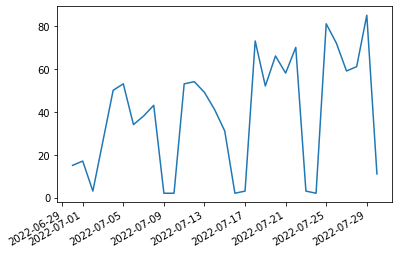

In [ ]:
df_skills["published_at"].value_counts().plot()

In [ ]:
day = df_skills.groupby(df_skills['published_at'].dt.day_name())['id'].count().sort_values(ascending=False)
day.head(7)

published_at
Monday       257
Friday       246
Tuesday      231
Thursday     213
Wednesday    208
Saturday      21
Sunday         7
Name: id, dtype: int64

In [ ]:
like = df_skills[df_skills['name'].str.lower().str.contains('python разработчик')]

In [ ]:
like.head()

,id,name,description,skills,published_at,created_at,salary
246,54739236,Python разработчик,Наша команда занимаемся развитием и сопровожд...,None,2022-07-21,2022-07-21T17:52:18+0300,None
401,54721570,Middle Python разработчик в SberDevices (инфра...,SberDevices — молодая IT-компания. Мы заним...,"Python, ML, HighLoad, C++, ElasticSearch",2022-07-11,2022-07-11T13:06:13+0300,None
427,68199440,Middle Python разработчик,Привет! Мы разрабатываем продукты для решения...,"Python, Docker, Adobe Photoshop, Django Framew...",2022-07-27,2022-07-27T12:29:53+0300,None
433,68021647,Python разработчик,Мы – команда SberSource. Наша основная задача...,"Python, Linux, JavaScript, Git, Английский язык",2022-07-21,2022-07-21T11:15:50+0300,None
496,66493031,Python разработчик,В SberData мы создаем централизованное хранил...,"Docker, Работа с базами данных, Big Data, Упра...",2022-07-18,2022-07-18T09:38:01+0300,None


In [ ]:
len(like)

6

In [ ]:
aaa = like['skills'].str.split(', ')
merged = []
for i in aaa:
  if i != None:
    merged += i
merged

['Python',
 'ML',
 'HighLoad',
 'C++',
 'ElasticSearch',
 'Python',
 'Docker',
 'Adobe Photoshop',
 'Django Framework',
 'Redis',
 'Python',
 'Linux',
 'JavaScript',
 'Git',
 'Английский язык',
 'Docker',
 'Работа с базами данных',
 'Big Data',
 'Управление временем']

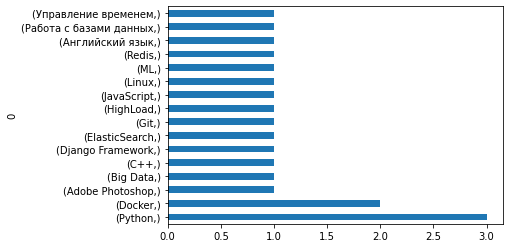

In [ ]:
pd.DataFrame(merged).value_counts().sort_values(ascending = True).plot(kind='barh')